# scikit-learnによるNNの実装

### 参考サイト
[MLPClassifierの公式サイト](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)  
[MLPClassifierのパラメータ](https://spjai.com/neural-network-parameter/)

In [1]:
# 必要なモジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# matplotlib のインライン表示や外部モジュールの autoreload
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [3]:
# scikit-learnからニューラルネットワークの実装に必要なライブライの読み込み
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

<img src="iris.png">

In [4]:
# irisデータセットの読み込み
iris = load_iris()
# 特徴量行列の定義
X = iris.data
# 正解ラベルの定義
y = iris.target
# 学習データと試験データとに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# データセットの表示
df = pd.DataFrame(X)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# NNをインスタンス化
clf = MLPClassifier(solver="sgd",random_state=0,max_iter=10000)
# 予測モデルの作成
clf.fit(X_train, y_train)
# clfのハイパーパラメターを表示
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 10000,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [6]:
# 予測結果の表示
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0])

In [7]:
# 予測精度の表示
clf.score(X_test, y_test)

0.9555555555555556

# matplotlibによるデータの可視化

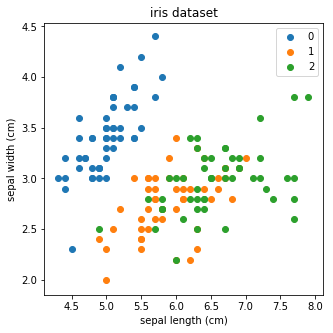

In [8]:
# 主成分をプロットする
plt.figure(figsize=(5,5))
for species in np.unique(y):
    plt.scatter(X[y==species,0],X[y==species,1] ,label=species)
    plt.legend()
    plt.title('iris dataset')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])

# 主成分分析(PCA)を用いた次元削減

(150, 2)
各次元の寄与率: [ 0.92461621  0.05301557]
累積寄与率: 0.9776317750248033


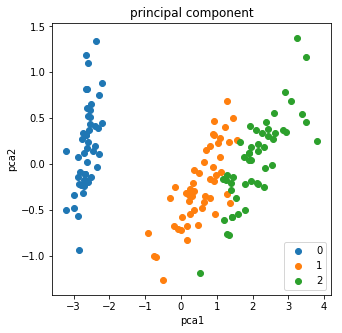

In [14]:
# 主成分分析する
pca = PCA(n_components=2)
pca.fit(df)

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(df)
print(transformed.shape)

# 主成分をプロットする
plt.figure(figsize=(5,5))
for species in np.unique(y):
    plt.scatter(transformed[y==species,0],transformed[y==species,1] ,label=species)
    plt.legend()
    plt.title('principal component')
    plt.xlabel('pca1')
    plt.ylabel('pca2')

# 主成分の寄与率を出力する
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

# グラフを表示する
plt.show()

# random forestを用いた予測

In [10]:
# ランダムフォレストに必要なモジュールの読み込み
import sklearn.model_selection
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [11]:
# F値が0.6を超えたら終了
for i in range(100):
    rf = RandomForestClassifier(n_estimators = 30, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_test_pred = rf.predict(X_test)
    
    if f1_score(y_test, y_test_pred, average='macro')  > 0.6:
        break

score_test = rf.score(X_test, y_test)
print("Test Accuracy: ", score_test)

Test Accuracy:  0.977777777778


In [12]:
# 各特徴量の重要度を計算
feature_importances = rf.feature_importances_   
feature_importances_dict = {}
print('Feature Importances:')
for i, feat in enumerate(df):
    feature_importances_dict[feat] = feature_importances[i]
sorted(feature_importances_dict.items(), key=lambda x:x[1])[::-1]

Feature Importances:


[('petal length (cm)', 0.51116048186482932),
 ('petal width (cm)', 0.38916220934053919),
 ('sepal length (cm)', 0.082484868230590813),
 ('sepal width (cm)', 0.0171924405640408)]

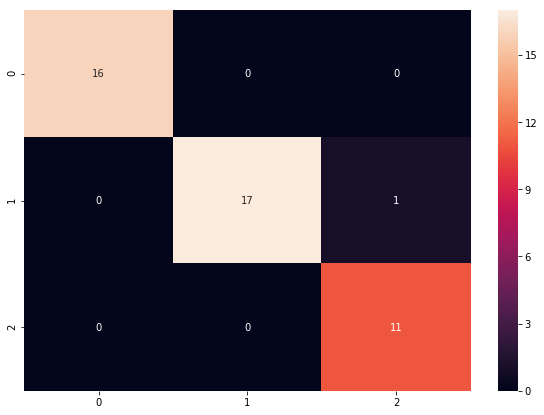

In [13]:
def print_cmx(true_y, pred_y):
    # ラベルの作成（重複の削除）
    labels = sorted(list(set(true_y)))
    cmx_data = confusion_matrix(true_y, pred_y, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sns.heatmap(df_cmx, annot=True)
    plt.show()
    
print_cmx(y_test, y_test_pred)